<a href="https://colab.research.google.com/github/gopal2812/mlblr/blob/master/HMM_2stateexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM_08_04
## Import packages
We'll create a hidden Markov model to examine the state-shifting in the dataset.

In [2]:
%matplotlib inline

import pylab
import numpy as np
import pandas as pd
!pip install hmmlearn
from hmmlearn.hmm import GaussianHMM

     |████████████████████████████████| 153kB 4.9MB/s 
  Created wheel for hmmlearn: filename=hmmlearn-0.2.2-cp27-cp27mu-linux_x86_64.whl size=301195 sha256=8aab0f56273147d91966badd2578656a3f39d12c0d003097562da9aa1ede94f2
  Stored in directory: /root/.cache/pip/wheels/2c/b6/0e/63a865a30e21e01d04f417d8995fbfb793d6bd464707efc546
Successfully built hmmlearn


## Import data
Read CSV file into "df."

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:

df = pd.read_csv("gdrive/My Drive/Ex_Files_DSF_DataMining/Exercise Files/Ch8/08_04/speed.csv", sep = ",")
df.head(5)

,row,rt,corr,Pacc,prev
0,1,6.456770,cor,0.0,inc
1,2,5.602119,cor,0.0,cor
2,3,6.253829,inc,0.0,cor
3,4,5.451038,inc,0.0,inc
4,5,5.872118,inc,0.0,inc


Drop the row number and "corr" so we can focus on the influence of "prev" and "Pacc" on "rt." Also define "prev" as a factor.

>>> cat = pd.Categorical(['a', 'a', 'c'], categories=['a', 'b', 'c'])
>>> labels, uniques = pd.factorize(cat)
>>> labels
array([0, 0, 1])
>>> uniques
[a, c]
Categories (3, object): [a, b, c]

In [0]:
x = df.drop(["row", "corr"], axis = 1)
x["prev"] = pd.factorize(x["prev"])[0]

## Create model
Make an HMM with 2 states. (The choice of 2 is based on theory.)

In [6]:
model = GaussianHMM(n_components=2, n_iter=10000, random_state=1).fit(x)
model.monitor_

ConvergenceMonitor(
    history=[-116.44940310318694, -116.44670518278312],
    iter=8,
    n_iter=10000,
    tol=0.01,
    verbose=False,
)

Predict the hidden state for each record and get count of predicted states.

In [7]:
states = model.predict(x)
pd.Series(states).value_counts()

0    243
1    196
dtype: int64

Get the mean reaction time (rt) for each of the two states.

In [8]:
model.means_[:, 0]

array([6.40098754, 5.56434105])

## Visualize results
Make a graph to show the change of states.

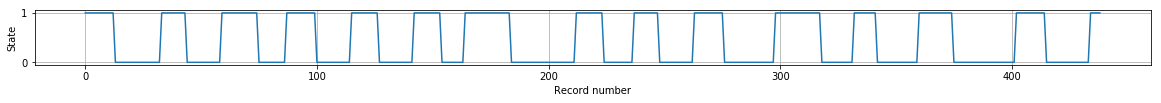

In [9]:
fig = pylab.figure(figsize=(20, 1))
ax = fig.add_subplot(111)
ax.grid(True)
ax.set_xlabel("Record number")
ax.set_ylabel("State")
ax.plot(states)